<a href="https://colab.research.google.com/github/Mordyfier/baseball-data-analysis/blob/master/3-variable-description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [ ]:
url = 'https://drive.google.com/uc?id=1JAbg8D_2Ui4ittfs7O6YgAo-TwfUfmtJ'
baseball = pd.read_csv(url)

## 1. Further improvements on the dataset

### More intelligent indexing

Even though the above dataset is in a decent shape, there are still aspects of it that would benefit from further improvement. For one, an explicit index of 0-1231 is meaningless and not very useful for accessing rows - it would be more convenient to use something else. However, Indexing by year or by team alone would also not be a great idea, given that for each year and for each team there are many fields (all the teams' rows in a given year and each team's seasons through the years for a given team, respectively). We can, however, assign the combination of Year and Team as a multi-index, as follows: 

In [ ]:
baseball = baseball.set_index(['Year', 'Team'])
baseball.head(30)

League    G   W    L  Playoffs  ...    OBP    SLG    OPS   OOBP   OSLG
Year Team                                 ...                                   
2012 ARI      NL  162  81   81     False  ...  0.328  0.418  0.746  0.317  0.415
     ATL      NL  162  94   68      True  ...  0.320  0.389  0.709  0.306  0.378
     BAL      AL  162  93   69      True  ...  0.311  0.417  0.728  0.315  0.403
     BOS      AL  162  69   93     False  ...  0.315  0.415  0.730  0.331  0.428
     CHC      NL  162  61  101     False  ...  0.302  0.378  0.680  0.335  0.424
     CHW      AL  162  85   77     False  ...  0.318  0.422  0.740  0.319  0.405
     CIN      NL  162  97   65      True  ...  0.315  0.411  0.726  0.305  0.390
     CLE      AL  162  68   94     False  ...  0.324  0.381  0.705  0.336  0.430
     COL      NL  162  64   98     False  ...  0.330  0.436  0.766  0.357  0.470
     DET      AL  162  88   74      True  ...  0.335  0.422  0.757  0.314  0.402
     HOU      NL  162  55  107     False  ...  0.302  0.371  0.673  0.337  0.427
     KCR      AL  162  72   90     False  ...  0.317  0.400  0.717  0.339  0.423
     LAA      AL  162  89   73     False  ...  0.332  0.433  0.765  0.310  0.403
     LAD      NL  162  86   76     False  ...  0.317  0.374  0.691  0.310  0.364
     MIA      NL  162  69   93     False  ...  0.308  0.382  0.690  0.327  0.399
     MIL      NL  162  83   79     False  ...  0.325  0.437  0.762  0.326  0.414
     MIN      AL  162  66   96     False  ...  0.325  0.390  0.715  0.333  0.442
     NYM      NL  162  74   88     False  ...  0.316  0.386  0.702  0.315  0.401
     NYY      AL  162  95   67      True  ...  0.337  0.453  0.790  0.311  0.419
     OAK      AL  162  94   68      True  ...  0.310  0.404  0.714  0.306  0.378
     PHI      NL  162  81   81     False  ...  0.317  0.400  0.717  0.306  0.407
     PIT      NL  162  79   83     False  ...  0.304  0.395  0.699  0.314  0.390
     SDP      NL  162  76   86     False  ...  0.319  0.380  0.699  0.319  0.398
     SEA      AL  162  75   87     False  ...  0.296  0.369  0.665  0.308  0.394
     SFG      NL  162  94   68      True  ...  0.327  0.397  0.724  0.313  0.393
     STL      NL  162  88   74      True  ...  0.338  0.421  0.759  0.313  0.387
     TBR      AL  162  90   72     False  ...  0.317  0.394  0.711  0.294  0.352
     TEX      AL  162  93   69      True  ...  0.334  0.446  0.780  0.309  0.408
     TOR      AL  162  73   89     False  ...  0.309  0.407  0.716  0.335  0.438
     WSN      NL  162  98   64      True  ...  0.322  0.428  0.750  0.303  0.373

[30 rows x 15 columns]

Now, using `.loc[<year>]`, we can more simply access each year's dataset without having to resort to more unwieldy 

`baseball[baseball.Year == <year>]`

In [ ]:
baseball.loc[2012]

,League,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
Team,,,,,,,,,,,,,,,
ARI,NL,162,81,81,False,NaN,NaN,734,688,0.259,0.328,0.418,0.746,0.317,0.415
ATL,NL,162,94,68,True,4.0,5.0,700,600,0.247,0.320,0.389,0.709,0.306,0.378
BAL,AL,162,93,69,True,5.0,4.0,712,705,0.247,0.311,0.417,0.728,0.315,0.403
BOS,AL,162,69,93,False,NaN,NaN,734,806,0.260,0.315,0.415,0.730,0.331,0.428
CHC,NL,162,61,101,False,NaN,NaN,613,759,0.240,0.302,0.378,0.680,0.335,0.424
CHW,AL,162,85,77,False,NaN,NaN,748,676,0.255,0.318,0.422,0.740,0.319,0.405
CIN,NL,162,97,65,True,2.0,4.0,669,588,0.251,0.315,0.411,0.726,0.305,0.390
CLE,AL,162,68,94,False,NaN,NaN,667,845,0.251,0.324,0.381,0.705,0.336,0.430
COL,NL,162,64,98,False,NaN,NaN,758,890,0.274,0.330,0.436,0.766,0.357,0.470


Using `pd.IndexSlice`, we can now more succinctly get more specific data for each team across a given period, e.g., to obtain the full data for the New York Yankees, we can use:

In [ ]:
idx = pd.IndexSlice
baseball.loc[idx[:, "NYY"], idx[:]]

,,League,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
Year,Team,,,,,,,,,,,,,,,
2012,NYY,AL,162,95,67,True,3.0,3.0,804,668,0.265,0.337,0.453,0.790,0.311,0.419
2011,NYY,AL,162,97,65,True,2.0,4.0,867,657,0.263,0.343,0.444,0.787,0.322,0.399
2010,NYY,AL,162,95,67,True,3.0,3.0,859,693,0.267,0.350,0.436,0.786,0.322,0.399
2009,NYY,AL,162,103,59,True,1.0,1.0,915,753,0.283,0.362,0.478,0.840,0.327,0.408
2008,NYY,AL,162,89,73,False,NaN,NaN,789,727,0.271,0.342,0.427,0.769,0.329,0.405
2007,NYY,AL,162,94,68,True,2.0,4.0,968,777,0.290,0.366,0.463,0.829,0.340,0.417
2006,NYY,AL,162,97,65,True,1.0,4.0,930,767,0.285,0.363,0.461,0.824,0.326,0.413
2005,NYY,AL,162,95,67,True,3.0,4.0,886,789,0.276,0.355,0.450,0.805,0.332,0.422
2004,NYY,AL,162,101,61,True,2.0,3.0,897,808,0.268,0.353,0.458,0.811,0.328,0.432


### RankSeason and RankPlayoffs as categories

Since the RankSeason and RankPlayoffs columns are positions of a given team (represented by each row in the dataframe), these two variables are categorical in nature. As we can see below, each season will contain only integer values between 1 and 8 for Season rank (i.e., the rank of the row's win total), or integer values 1 through 5 for playoff position (as until 2020, only 5 up to teams from each league qualified for the playoffs: 3 division winners and two non-division winners with the highest Win-Loss records).

In [ ]:
baseball.RankSeason.value_counts()

2.0    53
1.0    52
3.0    44
4.0    44
5.0    21
6.0    20
7.0     9
8.0     1
Name: RankSeason, dtype: int64

In [ ]:
baseball.RankPlayoffs.value_counts()

3.0    80
4.0    68
1.0    47
2.0    47
5.0     2
Name: RankPlayoffs, dtype: int64

This can be better represented by transforming these two variables into categories:

In [ ]:
baseball['RankPlayoffs'] = baseball.RankPlayoffs.astype('category')
baseball['RankSeason'] = baseball.RankSeason.astype('category')
baseball.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1232 entries, (2012, 'ARI') to (1962, 'WSA')
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   League        1232 non-null   object  
 1   G             1232 non-null   int64   
 2   W             1232 non-null   int64   
 3   L             1232 non-null   int64   
 4   Playoffs      1232 non-null   bool    
 5   RankSeason    244 non-null    category
 6   RankPlayoffs  244 non-null    category
 7   RS            1232 non-null   int64   
 8   RA            1232 non-null   int64   
 9   BA            1232 non-null   float64 
 10  OBP           1232 non-null   float64 
 11  SLG           1232 non-null   float64 
 12  OPS           1232 non-null   float64 
 13  OOBP          420 non-null    float64 
 14  OSLG          420 non-null    float64 
dtypes: bool(1), category(2), float64(6), int64(5), object(1)
memory usage: 125.4+ KB


## 2. Missing Values

`RankSeason` and `RankPlayoffs` apply only to teams' seasons (rows) that ended with a playoff appearance, therefore missing data for teams that did not make the playoffs that year. Since these variables are not instrumental for analysis - the mean, variance, and quartiles of these fields is meaningless - the fact that the data is missing is inconsequential. 

`OOBP` and `OSLG` are another two variables which do not have entries for the whole dataset. In this case, even though the complete data's presence would be beneficial for a more in-depth analysis of *what* helps a team succeed, the dataset is predominantly concerned with offensive statistics (runs scored, ratting average, on-base and slugging percentages). Nevertheless, especially since this data might still be useful for the overall picture, dropping these columns is unnecessary. Moreover, the missing data will not skew the analysis for the years that it's missing for. There is really no better value to replace the `NaN` entries with either, so it seems best to leave these columns as they are.

## 3. Variable Description

(Some helper wrapper functions to simplify the descriptions)

In [ ]:
def corr(column, colour='YlGn'):
  # computes and creates a visual map of correlations for a given column, accented with the passed colour
  corr = pd.DataFrame(baseball[baseball.columns[2:]].corr()[column]).transpose()
  display(corr)
  plt.figure(figsize=(10, 1))
  sns.heatmap(corr, cmap=colour, annot=True)

In [ ]:
def dist(column):
  # displays a histogram and a approximate distribution line for a given column
  sns.histplot(baseball[column], kde=True)

In [ ]:
def box(column):
  # displays a box-and-whiskers plot for a given column
  plt.figure(figsize=(3, 5))
  sns.boxplot(y=baseball[column])

In [ ]:
def ci(x):
  # 95% confidence interval for μ of a normal
  mean = baseball[x].mean()
  std = baseball[x].std()
  var = baseball[x].var()
  n = len(baseball[x])
  return sp.stats.t.interval(alpha=0.95, df=n-1, loc=mean, scale=sp.stats.sem(baseball[x]))

In [ ]:
def outliers(c):
  # finds and returns all the outliers (inner fence)
  iqr = baseball[c].quantile(0.75) - baseball[c].quantile(0.25)
  inner = iqr * 1.5

  low_inner = baseball[c].quantile(0.25) - inner
  high_inner = baseball[c].quantile(0.75) + inner
  outlier = {
      'low': [x for x in baseball[c] if x < low_inner],
      'high': [x for x in baseball[c] if x > high_inner], 
      }
  return outlier

### Categorical Variables

#### Year

Even though `Year` is part of the multi-index, we can still get its value counts and do other operations with its values. For example, we can see how many teams made up the MLB in each season below:

In [ ]:
baseball.index.get_level_values(0).value_counts().sort_index()

1962    20
1963    20
1964    20
1965    20
1966    20
1967    20
1968    20
1969    24
1970    24
1971    24
1973    24
1974    24
1975    24
1976    24
1977    26
1978    26
1979    26
1980    26
1982    26
1983    26
1984    26
1985    26
1986    26
1987    26
1988    26
1989    26
1990    26
1991    26
1992    26
1993    28
1996    28
1997    28
1998    30
1999    30
2000    30
2001    30
2002    30
2003    30
2004    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
2011    30
2012    30
Name: Year, dtype: int64

This can be visualized as follows(the white gap at above 1972, 1981, 1994, and 1995 signifies incomplete seasons missing from the data):

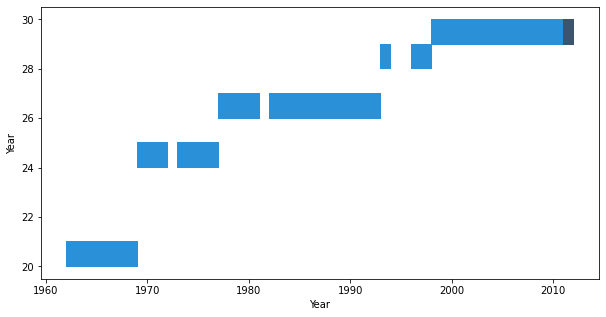

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=baseball.index.levels[0], y=baseball.index.get_level_values(0).value_counts().sort_index(), binwidth=1)

Clearly, the league expanded in increments of two at a time.

#### Team

Similar to above, we can find the number of teams in the league and how many of the 47 seasons played from 1962 to 2012 was each one involved in:

In [ ]:
baseball.index.get_level_values(1).value_counts().sort_values(ascending=False)

SFG    47
PHI    47
NYY    47
BAL    47
LAD    47
NYM    47
CHW    47
PIT    47
BOS    47
CHC    47
DET    47
CLE    47
MIN    47
HOU    47
STL    47
CIN    47
ATL    43
OAK    41
SDP    40
KCR    40
MIL    39
TEX    37
SEA    33
TOR    33
MON    32
CAL    28
COL    18
FLA    17
ARI    15
LAA    11
WSA    10
TBD    10
WSN     8
ANA     8
KCA     6
TBR     5
MLN     4
MIA     1
SEP     1
Name: Team, dtype: int64

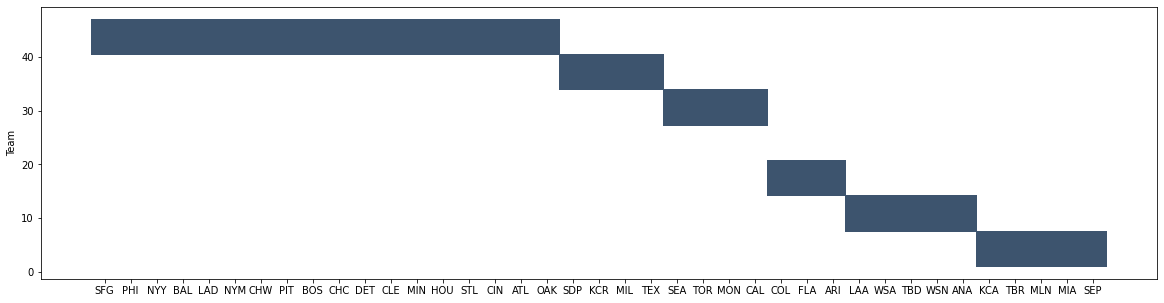

In [ ]:
plt.figure(figsize=(20, 5))
sns.histplot(x=baseball.index.get_level_values(1).value_counts().sort_values(ascending=False).index, y=baseball.index.get_level_values(1).value_counts().sort_values(ascending=False))

#### League

The MLB is composed of two sub-leagues: the American League and the National League. Throughout the years included in this dataset, each league maintained an even number of teams:

In [ ]:
baseball.League.value_counts()

AL    616
NL    616
Name: League, dtype: int64

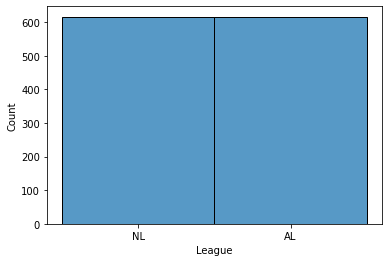

In [ ]:
sns.histplot(baseball['League'])

#### RankSeason

The RankSeason variable includes the final rank according to their Win-Loss ratio of every team that made the playoffs. This metric can be useful in determining, for example, if regular season performance translates to higher likelihood of Playoff success. The uneven spread of the values (particularly the dropoff in number of ranks 5-8) is a function of the expansions of playoffs.

In [ ]:
baseball.RankSeason.value_counts()

2.0    53
1.0    52
4.0    44
3.0    44
5.0    21
6.0    20
7.0     9
8.0     1
Name: RankSeason, dtype: int64

In [ ]:
playoff_teams = {x : baseball.loc[x, :, :].Playoffs.sum() for x in baseball.index.get_level_values(0).unique()}
playoff_teams

{1962: 2,
 1963: 2,
 1964: 2,
 1965: 2,
 1966: 2,
 1967: 2,
 1968: 2,
 1969: 4,
 1970: 4,
 1971: 4,
 1973: 4,
 1974: 4,
 1975: 4,
 1976: 4,
 1977: 4,
 1978: 4,
 1979: 4,
 1980: 4,
 1982: 4,
 1983: 4,
 1984: 4,
 1985: 4,
 1986: 4,
 1987: 4,
 1988: 4,
 1989: 4,
 1990: 4,
 1991: 4,
 1992: 4,
 1993: 4,
 1996: 8,
 1997: 8,
 1998: 8,
 1999: 8,
 2000: 8,
 2001: 8,
 2002: 8,
 2003: 8,
 2004: 8,
 2005: 8,
 2006: 8,
 2007: 8,
 2008: 8,
 2009: 8,
 2010: 8,
 2011: 8,
 2012: 10}

As seen above, the playoff format changed almost as often as the size of the league, starting from 2 (where only the regular season winners of each league played each other in the World Series), reaching all the way to 10 in 2012, where, besides the 3 best teams from each division in each league, another two runner-ups were allowed in as Wild Cards.

Playoff size growth over the years:

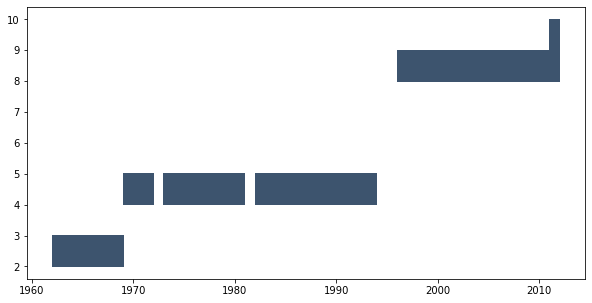

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=playoff_teams.keys(), y=playoff_teams.values(), binwidth=1)

Another, lesser reason for the unevenness is the fact that two teams could end with the same Win-Loss ratio, which would give them the same season rank (this can be seen easily by noting that there are more than 50 values for ranks 1 and 2, despite there only being 47 seasons in the dataset). 

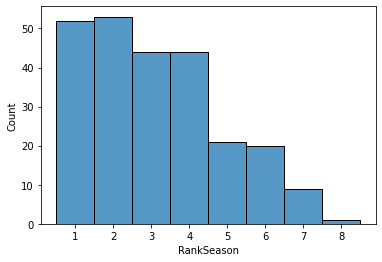

In [ ]:
sns.histplot(baseball['RankSeason'])

#### RankPlayoffs

A categorical variable, similar to RankSeason. This time, the ultimate ranking in the playoffs is considered. Similarly to above, there are nearly no teams that ranked 5 in the playoffs - since 2012 was the first year that the new Wild Card format that allowed a 5th team was instituted. This time, the number of number 1 and number 2 teams is equal to the number of seasons in the dataset. Clearly, while Win-Loss records can be shared by two teams, only one team could rank First or Second overall in a Playoff.

In [ ]:
baseball.RankPlayoffs.value_counts()

3.0    80
4.0    68
2.0    47
1.0    47
5.0     2
Name: RankPlayoffs, dtype: int64

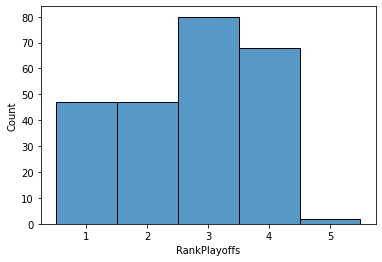

In [ ]:
sns.histplot(baseball['RankPlayoffs'])

### Numeric Variables

#### Games Played, Wins, Losses


These three variables denote the total games played by each team in the season, as well as their win - loss totals, respectively. The `Games` column is mostly the same for all teams (with few exceptions in the form of tie-breakers), since the MLB baseball season comprised of 162 games throghout the period described by this dataset. The `Win` and `Loss` columns are the main metric for a team's performance in a given season.

In [ ]:
baseball.G.describe()

count    1232.000000
mean      161.918831
std         0.624365
min       158.000000
25%       162.000000
50%       162.000000
75%       162.000000
max       165.000000
Name: G, dtype: float64

In [ ]:
baseball.W.describe()

count    1232.000000
mean       80.904221
std        11.458139
min        40.000000
25%        73.000000
50%        81.000000
75%        89.000000
max       116.000000
Name: W, dtype: float64

In [ ]:
baseball.L.describe()

count    1232.000000
mean       81.014610
std        11.409295
min        46.000000
25%        73.000000
50%        81.000000
75%        89.000000
max       121.000000
Name: L, dtype: float64

Of note in the above descriptions are their respective `min` and `max` values which indicate outliers. It is understandable that Major League Baseball would pursue parity, and thus most teams do not win more than 60% of their games. However, exceptional seasons do exist in both columns.

We can find the correlations between the `Win` column and other columns with the command below (using the `corr()` function we defined earlier):

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
W,1.0,-0.998518,0.616757,0.511745,-0.532394,0.408716,0.481836,0.401496,0.446972,-0.634315,-0.56849


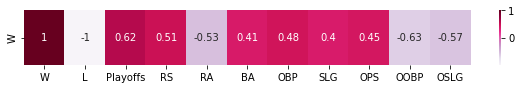

In [ ]:
corr("W", "PuRd")

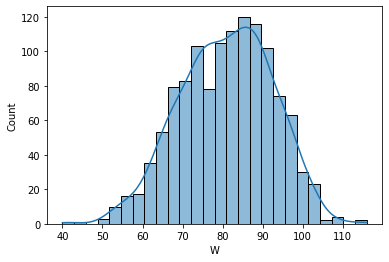

In [ ]:
dist("W")

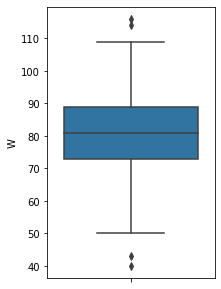

In [ ]:
box("W")

In [ ]:
outliers("W")

{'high': [116, 114], 'low': [43, 40]}

Similarly, for losses:

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
L,-0.998518,1.0,-0.618182,-0.509821,0.533394,-0.409377,-0.482993,-0.401202,-0.447137,0.634181,0.570313


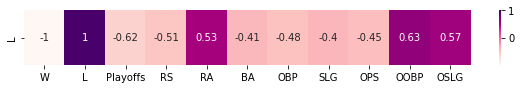

In [ ]:
corr("L", "RdPu")

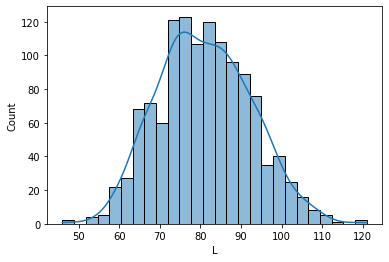

In [ ]:
dist("L")

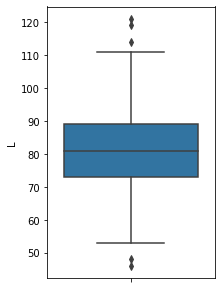

In [ ]:
box("L")

In [ ]:
outliers("L")

{'high': [119, 114, 121], 'low': [46, 48]}

Unsurprisingly, the `W` and `L` are almost perfectly negatively correlated (with correlation coefficient of approximately -1). Since these two columns are related by each other linearly (G = W + L), anything that benefits from a higher `Win` total is hurt by a higher `Loss` total and vice versa. (The correlation value being slightly above -1 in each case is most likely due to the slight variations in the number of games played - some teams may have needed tie-breakers at the end of their season).

Both variables appear to be normally distributed with a mean of about 81, which is half of the baseball season. There don't seem to be many outliers, either - vast majority of the datapoints seem to be contained within the whiskers, with only a few particularly exceptionally good or bad seasons sprinkled outside of the ranges.

#### Playoffs

A boolean variable (originally 1 and 0). Indicates whether a given season ended with a playoff appearance. Since this variable only takes on binary values, a mean and quartiles are meaningless. However, correlation with other variables is a valid aspect of this column that we can explore:

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
Playoffs,0.616757,-0.618182,1.0,0.386628,-0.261477,0.290217,0.36389,0.324713,0.353084,-0.433572,-0.366744


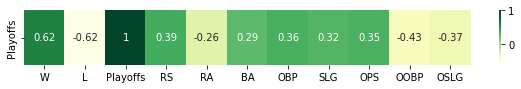

In [ ]:
corr("Playoffs", "YlGn")

`RankSeason` and `RankPlayoffs` do not have a correlation value which is understandable, since these two variables are fully dependent on `Playoffs` being equal to `True` (and do not have a value otherwise - therefore, a change in `Playoffs` is only a change in whether a value in those columns exists without a mapping to the value itself).

Note: Throghout the years, the format of MLB Playoffs changed. In this dataset, in the years 1962-1969 "playoffs" consisted of only the World Series - one game between the Win-Loss record-wise top teams in the American League and National League. While this does mean that for those seasons fewer teams would have made the playoffs, it shouldn't affect the observations in the larger picture (particularly the positive correlations between reaching the playoffs and win totals or offensive statistics). Because of this, the columns `RankSeason` and `RankPlayoffs` might be slightly affected (mostly their correlations, since the mean and distribution are of no real value for analysis - each year carries a similar number of playoff teams and their rankings with respect to each other).

#### Runs Scored, Runs Against

The runs scored and runs agains columns go hand-in-hand with each other, given that their means and quartiles should end up almost identical - after all, over the span of this dataset, all the seasons' stats are accounted for, which means that, overall, the number of runs scored against all the teams is equal to the number of runs scored *by* all the teams. Nevertheless, this column will prove useful for correlations, as well as for higher-level analysis, when considering what other metrics contribute to a high Runs Scored total (and thus, indirectly, to a high Win total - correlation 0.51)

In [ ]:
baseball.RS.describe()

count    1232.000000
mean      715.081981
std        91.534294
min       463.000000
25%       652.000000
50%       711.000000
75%       775.000000
max      1009.000000
Name: RS, dtype: float64

In [ ]:
baseball.RA.describe()

count    1232.000000
mean      715.081981
std        93.079933
min       472.000000
25%       649.750000
50%       709.000000
75%       774.250000
max      1103.000000
Name: RA, dtype: float64

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
RS,0.511745,-0.509821,0.386628,1.0,0.380139,0.827,0.900492,0.91874,0.956943,0.133981,0.193426


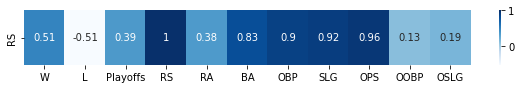

In [ ]:
corr("RS", "Blues")

Based on the above correlation vector, the number of runs a team scores plays a significant role in the number of Wins they end up with, though it is certainly not the only factor. Surely, there could be teams that win the most games despite not scoring the most runs - e.g., simply by preventing more runs being scored against them.

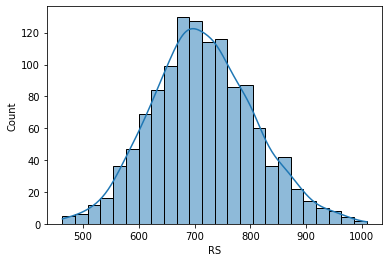

In [ ]:
dist("RS")

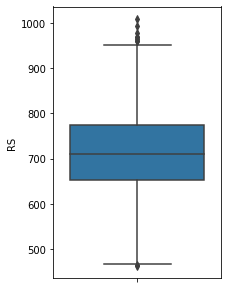

In [ ]:
box("RS")

In [ ]:
outliers("RS")

{'high': [968, 961, 978, 968, 1009, 965, 961, 993], 'low': [463, 464]}

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
RA,-0.532394,0.533394,-0.261477,0.380139,1.0,0.330764,0.32636,0.436527,0.421601,0.910344,0.909319


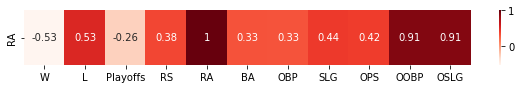

In [ ]:
corr("RA", "Reds")

Conversely to the Runs Scored column, the Runs Against column is negatively correlated with Win column - the more runs a team gives up, the fewer games they win. 

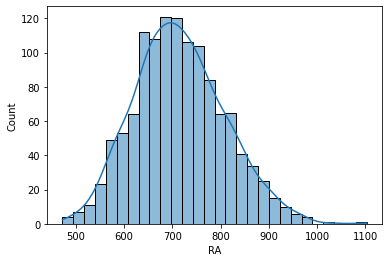

In [ ]:
dist("RA")

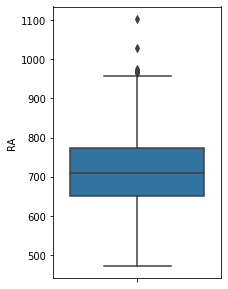

In [ ]:
box("RA")

#### Batting Average

A simple ratio of hits to at-bats. For years considered to be the main metric for evaluation of offensive talent, but when more informative statistics were developed, team executives realized that this stat does not tell the whole story.

In [ ]:
baseball.BA.describe()

count    1232.000000
mean        0.259273
std         0.012907
min         0.214000
25%         0.251000
50%         0.260000
75%         0.268000
max         0.294000
Name: BA, dtype: float64

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
BA,0.408716,-0.409377,0.290217,0.827,0.330764,1.0,0.851958,0.790481,0.848502,0.187108,0.227808


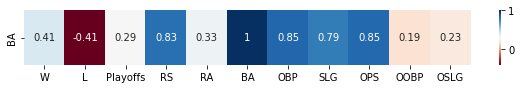

In [ ]:
corr("BA", "RdBu")

Batting Average is a simple measure of Hits divided by Attempts, i.e., what percentage of a hitter's or - in this case - a team's attempts to hit the ball ended with a positive outcome of putting the ball in play and getting on base as a result. Certainly, this metric will be correlated with the other metrics that build upon it and expand it: On-Base percentage is a measure of all sucessful at-bats, whereas Slugging is a 'weighted' Batting Average that accounts for the 'quality' of a hit. It is therefore unsuprising that there is a strong correlation between BA and OBP/SLG. 

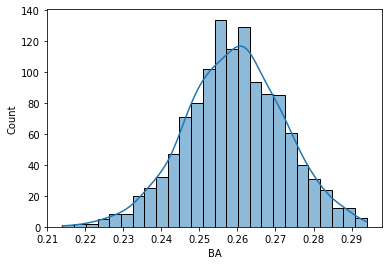

In [ ]:
dist("BA")

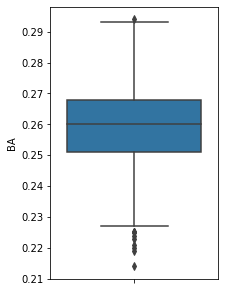

In [ ]:
box("BA")

In [ ]:
outliers("BA")

{'high': [0.294],
 'low': [0.225,
  0.225,
  0.214,
  0.22399999999999998,
  0.225,
  0.225,
  0.223,
  0.221,
  0.22,
  0.21899999999999997]}

#### On-Base Percentage

On-Base Percentage is an expansion on the Batting Average - OBP takes into account also things like walks and hits by pitch (where the batter gets to take the first base for free). The formula is:

OBP = (Hits + Walks + Hit-By-Pitch)/(Plate Appearances + Walks + Hit-By-Pitch + Sacrifice Fly)

Since a runner can score regardless of how they got on base, this stat gives more information than simple Batting Average - leading teams to realize that it might be as - if not more - effective in providing a numeric value to a player.

In [ ]:
baseball.OBP.describe()

count    1232.000000
mean        0.326331
std         0.015013
min         0.277000
25%         0.317000
50%         0.326000
75%         0.337000
max         0.373000
Name: OBP, dtype: float64

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OBP,0.481836,-0.482993,0.36389,0.900492,0.32636,0.851958,1.0,0.79091,0.897059,0.120349,0.153372


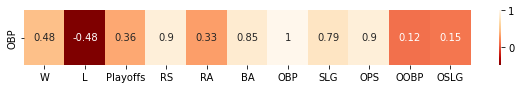

In [ ]:
corr("OBP", "OrRd_r")

Based on above correlations, we can see that On-Base percentage is not only also strongly correlated with Runs Scored and Wins totals, but even more so than Batting Average (e.g.: BA corr with W: 0.41, OBP corr with W: 0.48). It is therefore fathomable that OBP could serve as a more accurate measure of success than BA.

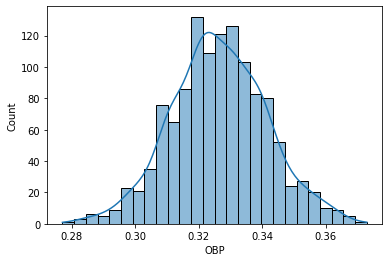

In [ ]:
dist("OBP")

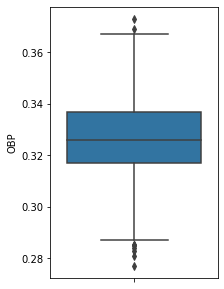

In [ ]:
box("OBP")

In [ ]:
outliers("OBP")

{'high': [0.373, 0.369],
 'low': [0.285,
  0.284,
  0.281,
  0.27699999999999997,
  0.285,
  0.28300000000000003,
  0.285]}

#### Slugging Percentage

Slugging Percentage, or the propensity for an offence (or a player) to reach extra bases. The formula is, where "XB" denotes the number of hits that allowed the batter to reach base X (1 - first, 2 - second, 3 - third, 4 - home run):

SLG = ((1 * 1B) + (2 * 2B) + (3 * 3B) + (4 * HR))/Plate appearances

In practice, this is a statistic that denotes the 'power' (or slugging) of a hitter, and, since a hit that advances the batter to the second base has a higher likelihood to allow more runners to score - players with a high SLG stat should provide a valuable impact to any offense.

In [ ]:
baseball.SLG.describe()

count    1232.000000
mean        0.397342
std         0.033267
min         0.301000
25%         0.375000
50%         0.396000
75%         0.421000
max         0.491000
Name: SLG, dtype: float64

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
SLG,0.401496,-0.401202,0.324713,0.91874,0.436527,0.790481,0.79091,1.0,0.979913,0.143861,0.210423


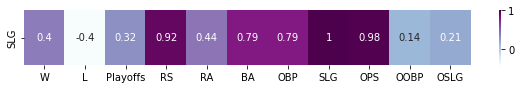

In [ ]:
corr("SLG", "BuPu")

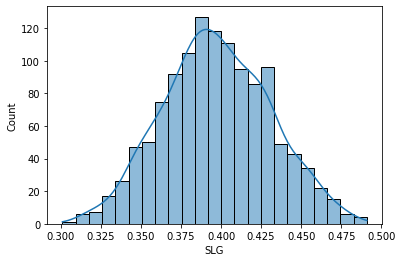

In [ ]:
dist("SLG")

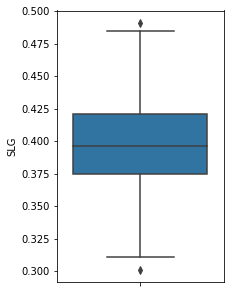

In [ ]:
box("SLG")

In [ ]:
outliers("SLG")

{'high': [0.491], 'low': [0.301]}

#### On-Base + Slugging (OPS)

OPS is simply a sum of On-Base Percentage and Slugging Percentage. Some prolific sluggers might not be partucularly great at getting on base. Conversely, some great contact hitters or disciplined batters who draw many walks might not be providing much power to their lineup. The OPS stat allows these deficiencies in one area to potentially balance out with proficiencies in the other. Indeed, although the team Runs Scored statistic is strongly correlated with all of the other offensive statistics as well (BA: 0.827	OBP: 0.900492	SLG: 0.91874)	, its correlation with OPS is the greatest (0.956943).

In [ ]:
baseball.OPS.describe()

count    1232.000000
mean        0.723673
std         0.046066
min         0.584000
25%         0.694000
50%         0.722000
75%         0.755000
max         0.851000
Name: OPS, dtype: float64

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OPS,0.446972,-0.447137,0.353084,0.956943,0.421601,0.848502,0.897059,0.979913,1.0,0.143209,0.201116


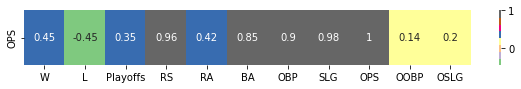

In [ ]:
corr("OPS", "Accent")

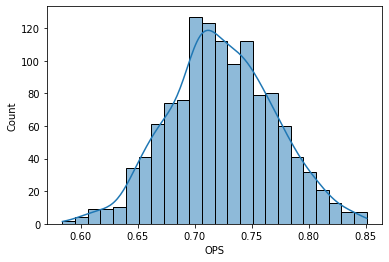

In [ ]:
dist("OPS")

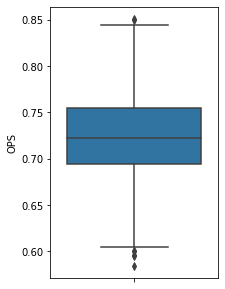

In [ ]:
box("OPS")

In [ ]:
outliers("OPS")

{'high': [0.851, 0.85], 'low': [0.595, 0.596, 0.6, 0.584, 0.6]}

#### Opponents' On-Base and Opponents' Slugging (OOBP and OSLG)

Opponents' On-Base and Slugging percentages are - unlike almost everything so far - not offensive, but defensive statistics. There are other defensive statistics (such as ERA - Earned Run Average for pitchers) that could have been included in this dataset as well, but OOBP and OSLG can also indicate what kinds of players are useful (or to be avoided - e.g., pitchers who give up a lot of hits/have a high slugging percentage against them). Both stats are understandably strongly correlated with the `Runs Against` and `Losses` columns.

In [ ]:
baseball.OOBP.describe()

count    420.000000
mean       0.332264
std        0.015295
min        0.294000
25%        0.321000
50%        0.331000
75%        0.343000
max        0.384000
Name: OOBP, dtype: float64

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OOBP,-0.634315,0.634181,-0.433572,0.133981,0.910344,0.187108,0.120349,0.143861,0.143209,1.0,0.830902


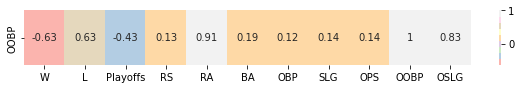

In [ ]:
corr("OOBP", "Pastel1")

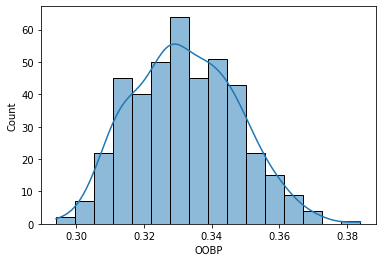

In [ ]:
dist("OOBP")

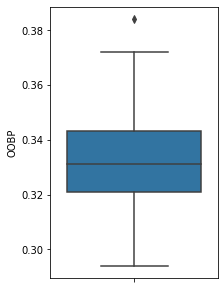

In [ ]:
box("OOBP")

In [ ]:
outliers("OOBP")

{'high': [0.384], 'low': []}

In [ ]:
baseball.OSLG.describe()

count    420.000000
mean       0.419743
std        0.026510
min        0.346000
25%        0.401000
50%        0.419000
75%        0.438000
max        0.499000
Name: OSLG, dtype: float64

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OSLG,-0.56849,0.570313,-0.366744,0.193426,0.909319,0.227808,0.153372,0.210423,0.201116,0.830902,1.0


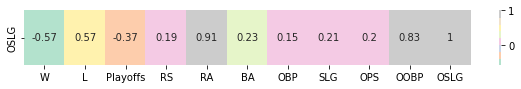

In [ ]:
corr("OSLG", "Pastel2")

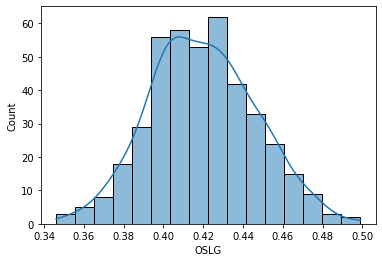

In [ ]:
dist("OSLG")

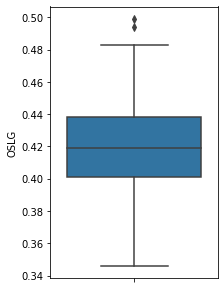

In [ ]:
box("OSLG")

In [ ]:
outliers("OSLG")

{'high': [0.494, 0.499], 'low': []}

## Summary

Below is a description of the numerical variables contained within the dataset. Due to the sample size and relative even distribution of the data, the mean and the median are very close in each column:

In [ ]:
baseball.describe(include='all')

,League,G,W,L,Playoffs,RankSeason,RankPlayoffs,WonWorldSeries,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
count,1232,1232.000000,1232.000000,1232.000000,1232,244.0,244.0,1232,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,420.000000,420.000000,1232
unique,2,NaN,NaN,NaN,2,8.0,5.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,AL,NaN,NaN,NaN,False,2.0,3.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,616,NaN,NaN,NaN,988,53.0,80.0,1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1185
mean,NaN,161.918831,80.904221,81.014610,NaN,NaN,NaN,NaN,715.081981,0.259273,0.326331,0.397342,0.723673,0.332264,0.419743,NaN
std,NaN,0.624365,11.458139,11.409295,NaN,NaN,NaN,NaN,93.079933,0.012907,0.015013,0.033267,0.046066,0.015295,0.026510,NaN
min,NaN,158.000000,40.000000,46.000000,NaN,NaN,NaN,NaN,472.000000,0.214000,0.277000,0.301000,0.584000,0.294000,0.346000,NaN
25%,NaN,162.000000,73.000000,73.000000,NaN,NaN,NaN,NaN,649.750000,0.251000,0.317000,0.375000,0.694000,0.321000,0.401000,NaN
50%,NaN,162.000000,81.000000,81.000000,NaN,NaN,NaN,NaN,709.000000,0.260000,0.326000,0.396000,0.722000,0.331000,0.419000,NaN
75%,NaN,162.000000,89.000000,89.000000,NaN,NaN,NaN,NaN,774.250000,0.268000,0.337000,0.421000,0.755000,0.343000,0.438000,NaN


As described by pandas' `describe()` method seen in the cell above, there are 13 numerical variables (although the 14th, 'Playoffs', is also numerically-convertible) in the DataFrame. Of these, while some aren't very useful for variable analysis, all are valid for correlation:

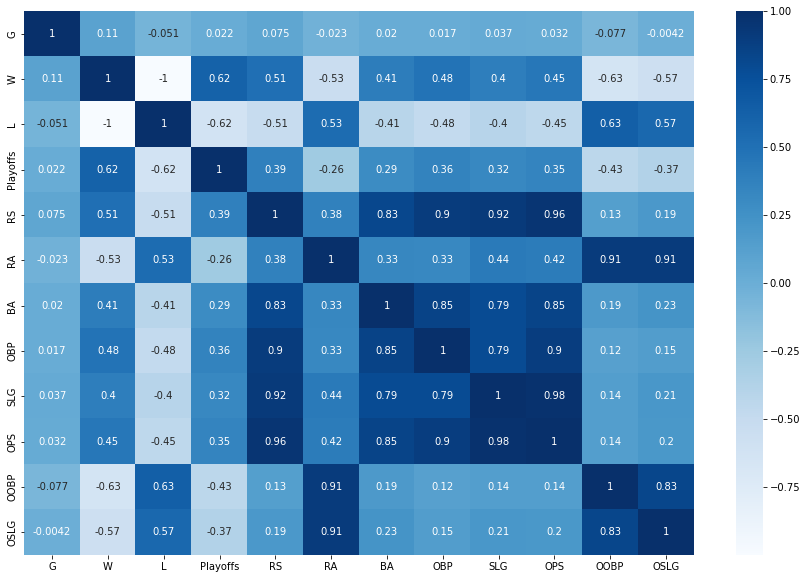

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(baseball.corr(), cmap='Blues', annot=True)

However, when trying to establish the approximate distributions, it is relatively meaningless to try to do so for "Games", "Playoffs", "RankSeason", and "RankPlayoffs" - since all are pretty much constant and their randomness is relatively inconsequential on the scope of the entire dataset (while their assignment is random, their values are - for the most part - not. In each given year, there will be one World Series winner denoted by a `1.0` in RankPlayoffs column, and so on).

The remaining variables' distribution are plotted below via histograms and kernel density estimates. For the most part, all 10 of these variables appear to be distributed normally, and - due to the sample size for each column - their arithmetic estimators for mean and variance should be relatively accurate to the actual mean and variance of the underlying distributions. 

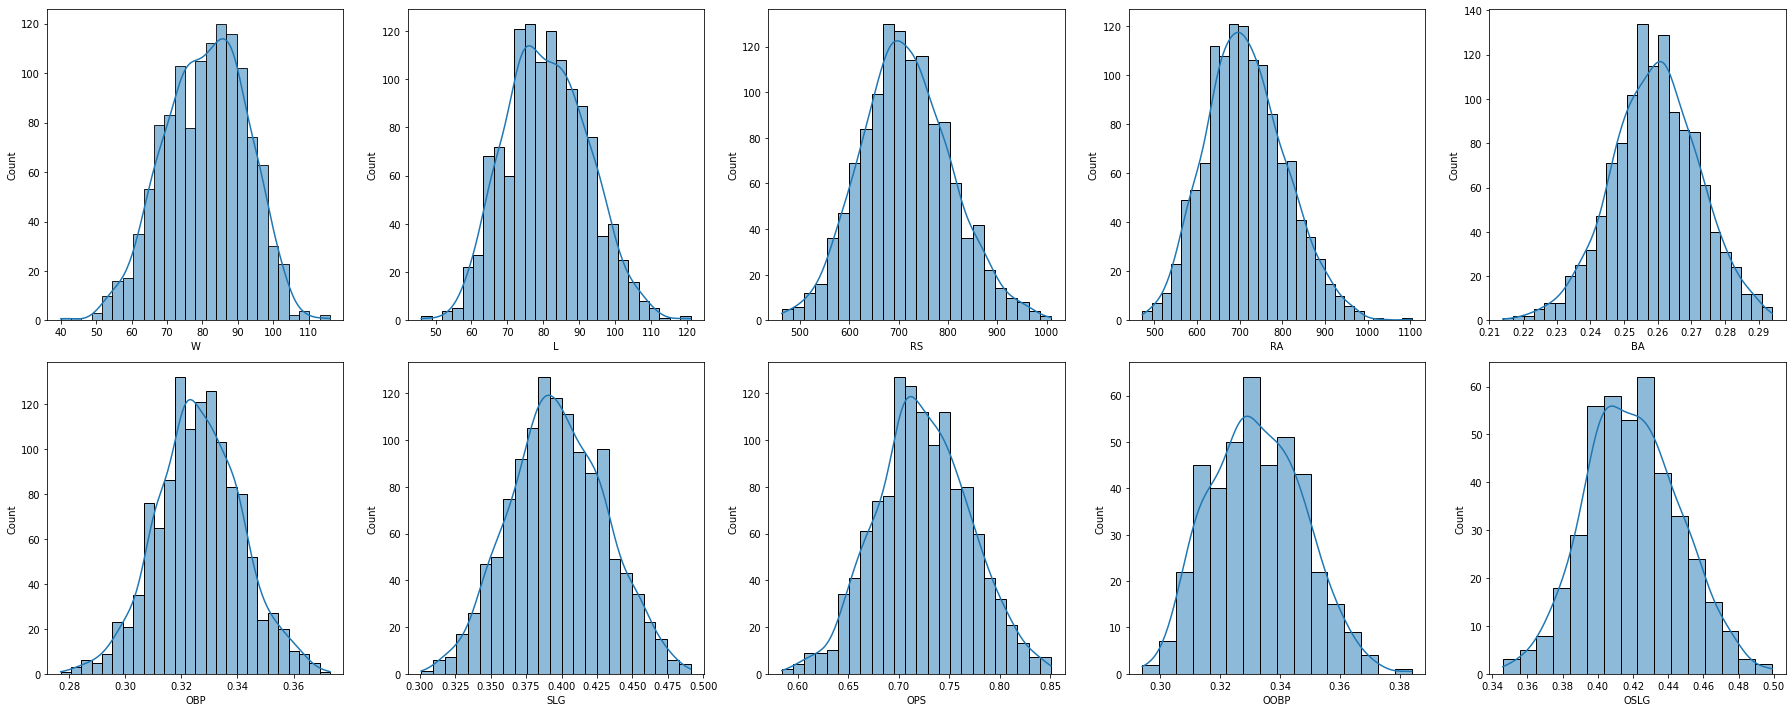

In [ ]:
plt.figure(figsize=(25, 10))
columns = ['W', 'L', 'RS', 'RA', 'BA', 'OBP', 'SLG', 'OPS', 'OOBP', 'OSLG']
for i in range(len(columns)):
  plt.subplot(2, len(columns)/2, i+1)
  sns.histplot(baseball[columns[i]], kde=True)
  plt.tight_layout()

From the box-and-whisker plots below, we can see that the data has relatively few outliers overall, though most of the league appears to have been not too far away from the median:

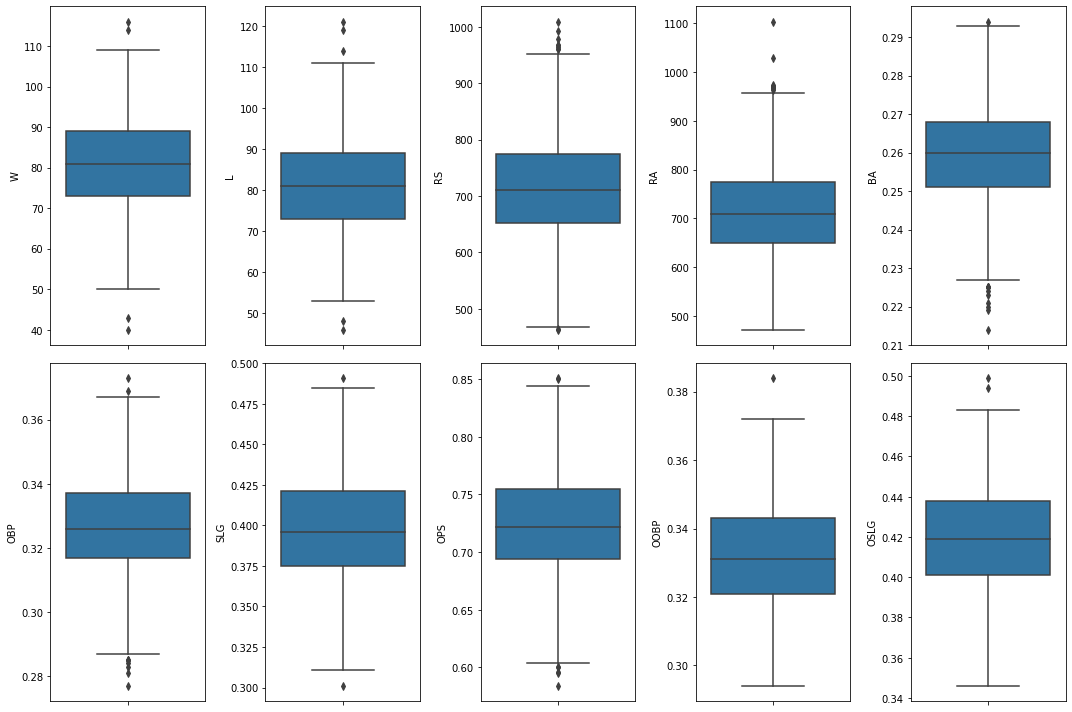

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(len(columns)):
  plt.subplot(2, len(columns)/2, i+1)
  sns.boxplot(y=baseball[columns[i]], orient='v')
  plt.tight_layout()

#### Won World Series

Another correlation we can include is between each column and the boolean "did this team with the World Series in a given year", obtained by the following assignment:

In [ ]:
won_world_series = baseball.RankPlayoffs == 1

In [ ]:
baseball['won_WS'] = won_world_series
baseball.head(30)

League    G   W    L  Playoffs  ...    SLG    OPS   OOBP   OSLG  won_WS
Year Team                                 ...                                    
2012 ARI      NL  162  81   81     False  ...  0.418  0.746  0.317  0.415   False
     ATL      NL  162  94   68      True  ...  0.389  0.709  0.306  0.378   False
     BAL      AL  162  93   69      True  ...  0.417  0.728  0.315  0.403   False
     BOS      AL  162  69   93     False  ...  0.415  0.730  0.331  0.428   False
     CHC      NL  162  61  101     False  ...  0.378  0.680  0.335  0.424   False
     CHW      AL  162  85   77     False  ...  0.422  0.740  0.319  0.405   False
     CIN      NL  162  97   65      True  ...  0.411  0.726  0.305  0.390   False
     CLE      AL  162  68   94     False  ...  0.381  0.705  0.336  0.430   False
     COL      NL  162  64   98     False  ...  0.436  0.766  0.357  0.470   False
     DET      AL  162  88   74      True  ...  0.422  0.757  0.314  0.402   False
     HOU      NL  162  55  107     False  ...  0.371  0.673  0.337  0.427   False
     KCR      AL  162  72   90     False  ...  0.400  0.717  0.339  0.423   False
     LAA      AL  162  89   73     False  ...  0.433  0.765  0.310  0.403   False
     LAD      NL  162  86   76     False  ...  0.374  0.691  0.310  0.364   False
     MIA      NL  162  69   93     False  ...  0.382  0.690  0.327  0.399   False
     MIL      NL  162  83   79     False  ...  0.437  0.762  0.326  0.414   False
     MIN      AL  162  66   96     False  ...  0.390  0.715  0.333  0.442   False
     NYM      NL  162  74   88     False  ...  0.386  0.702  0.315  0.401   False
     NYY      AL  162  95   67      True  ...  0.453  0.790  0.311  0.419   False
     OAK      AL  162  94   68      True  ...  0.404  0.714  0.306  0.378   False
     PHI      NL  162  81   81     False  ...  0.400  0.717  0.306  0.407   False
     PIT      NL  162  79   83     False  ...  0.395  0.699  0.314  0.390   False
     SDP      NL  162  76   86     False  ...  0.380  0.699  0.319  0.398   False
     SEA      AL  162  75   87     False  ...  0.369  0.665  0.308  0.394   False
     SFG      NL  162  94   68      True  ...  0.397  0.724  0.313  0.393    True
     STL      NL  162  88   74      True  ...  0.421  0.759  0.313  0.387   False
     TBR      AL  162  90   72     False  ...  0.394  0.711  0.294  0.352   False
     TEX      AL  162  93   69      True  ...  0.446  0.780  0.309  0.408   False
     TOR      AL  162  73   89     False  ...  0.407  0.716  0.335  0.438   False
     WSN      NL  162  98   64      True  ...  0.428  0.750  0.303  0.373   False

[30 rows x 16 columns]

,W,L,Playoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG,won_WS
won_WS,0.270626,-0.270367,0.40075,0.12588,-0.153151,0.111724,0.120692,0.085367,0.100982,-0.136051,-0.121929,1.0


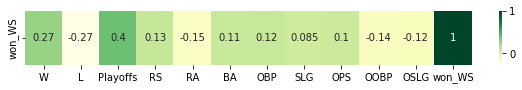

In [ ]:
corr('won_WS')

Unsurprisingly, the more losses or runs scored against them a team had, the lower were its chances of winning the World Series overall. Interestingly though, while the final Win/Loss record does seem to impact the likelihood a team will win the World Series, the particular offensive statistics seem to have less of an impact. This is something that could be explored in more detail.